# Exploratory Data Analysis

## Import Libraries

In [1]:
########################### Import Requisite Libraries #########################
import pandas as pd
import numpy as np
import os
import sys
import pprint

################################################################################
# Add the parent directory to sys.path to access 'functions.py'
sys.path.append(os.path.join(os.pardir))
from python_scripts.functions import *

## Read in the Data

In [2]:
base_path = os.path.join(os.pardir)

# Go up one level from 'notebooks' to the parent directory, then into the 'data' folder
data_path = os.path.join(os.pardir, "data")

image_path_png = os.path.join(base_path, "images", "png_images")
image_path_svg = os.path.join(base_path, "images", "svg_images")

# Use the function to ensure the 'data' directory exists
ensure_directory(data_path)
ensure_directory(image_path_png)
ensure_directory(image_path_svg)

# Read the CSV file into a DataFrame
df_eda = pd.read_parquet(os.path.join(data_path, "df_eda.parquet"))

Directory exists: ..\data
Directory exists: ..\images\png_images
Directory exists: ..\images\svg_images


In [3]:
df_eda.head()

,Attendance date,Age,SEX,ETHNICITY,Diabetes (1=yes; 0=no),Hypertension (1=yes; 0=no),"Renal disease (DM=1, HTN=2, GN=3, ADPKD=4, Other=5)",eGFR-EPI,uPCR,Calcium (mmol/L),...,ETHNICITY_CHINESE (OTHER ETHNIC GROUPS),ETHNICITY_INDIAN (ASIAN OR ASIAN BRITISH),ETHNICITY_NOT STATED,ETHNICITY_PAKISTANI (ASIAN OR ASIAN BRITISH),ETHNICITY_WHITE AND BLACK AFRICAN (MIXED),ETHNICITY_WHITE BRITISH,ETHNICITY_WHITE IRISH,uACR,log_uACR,age_group
Patient_ID,,,,,,,,,,,,,,,,,,,,,
568268916,11/02/2015,87.24,Male,WHITE BRITISH,1.0,1.0,1.0,19.0,33.0,2.78,...,0,0,0,0,0,1,0,4.880381,1.585223,80-89
659549633,06/05/2015,56.88,Female,WHITE BRITISH,0.0,1.0,5.0,15.0,395.0,2.43,...,0,0,0,0,0,1,0,133.958078,4.897527,50-59
406748956,04/05/2016,66.53,Female,WHITE BRITISH,0.0,1.0,3.0,17.0,163.0,2.33,...,0,0,0,0,0,1,0,33.582601,3.514008,60-69
109228713,16/11/2011,69.92,Male,WHITE IRISH,0.0,1.0,3.0,12.0,250.0,2.29,...,0,0,0,0,0,0,1,65.597668,4.183540,60-69
220533110,02/05/2018,81.14,Female,WHITE BRITISH,1.0,1.0,1.0,15.0,217.0,2.45,...,0,0,0,0,0,1,0,52.594724,3.962616,80-89


All crosstabs have been saved in ..\data.


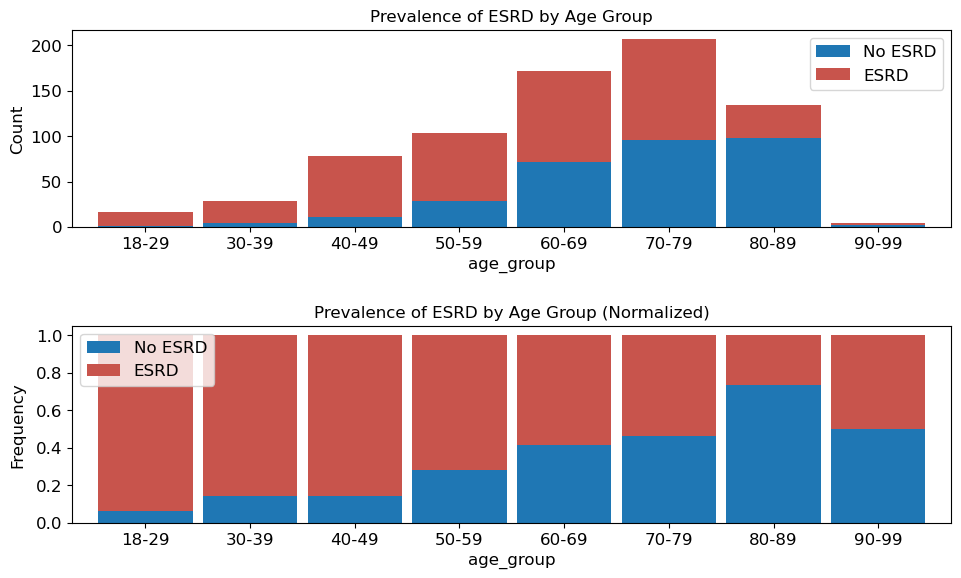

ESRD,No ESRD,ESRD,Total,ESRD_%,No ESRD_%,Total_%,Identifier
age_group,,,,,,,
18-29,1,15,16,94.0,6.0,100.0,ESRD
30-39,4,24,28,86.0,14.0,100.0,ESRD
40-49,11,67,78,86.0,14.0,100.0,ESRD
50-59,29,75,104,72.0,28.0,100.0,ESRD
60-69,71,101,172,59.0,41.0,100.0,ESRD
70-79,96,111,207,54.0,46.0,100.0,ESRD
80-89,98,36,134,27.0,73.0,100.0,ESRD
90-99,2,2,4,50.0,50.0,100.0,ESRD
Total,312,431,743,58.0,42.0,100.0,ESRD


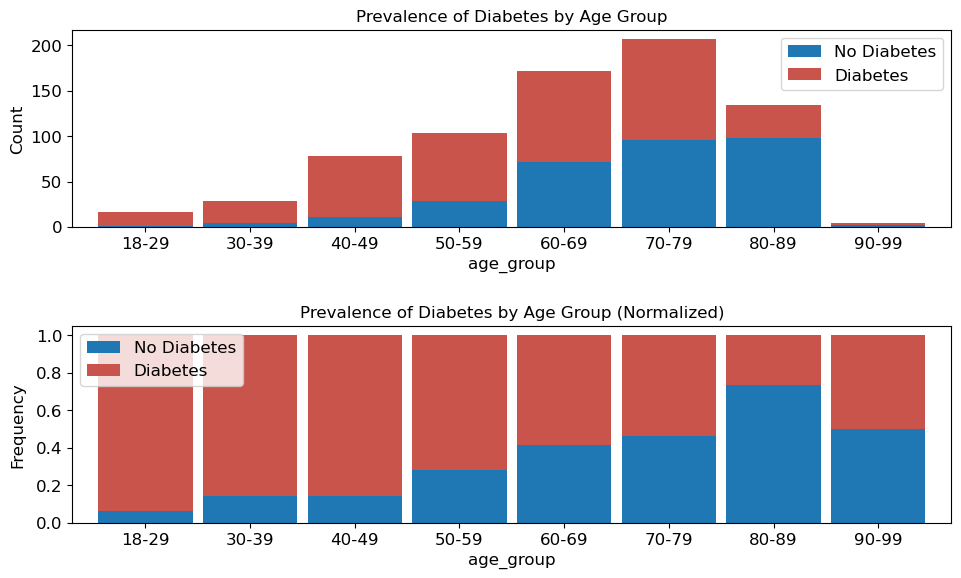

Diabetes (1=yes; 0=no),No Diabetes,Diabetes,Total,Diabetes_%,No Diabetes_%,Total_%,Identifier
age_group,,,,,,,
18-29,15,1,16,6.0,94.0,100.0,Diabetes (1=yes; 0=no)
30-39,21,7,28,25.0,75.0,100.0,Diabetes (1=yes; 0=no)
40-49,52,26,78,33.0,67.0,100.0,Diabetes (1=yes; 0=no)
50-59,59,45,104,43.0,57.0,100.0,Diabetes (1=yes; 0=no)
60-69,95,77,172,45.0,55.0,100.0,Diabetes (1=yes; 0=no)
70-79,115,92,207,44.0,56.0,100.0,Diabetes (1=yes; 0=no)
80-89,89,45,134,34.0,66.0,100.0,Diabetes (1=yes; 0=no)
90-99,1,3,4,75.0,25.0,100.0,Diabetes (1=yes; 0=no)
Total,447,296,743,40.0,60.0,100.0,Diabetes (1=yes; 0=no)


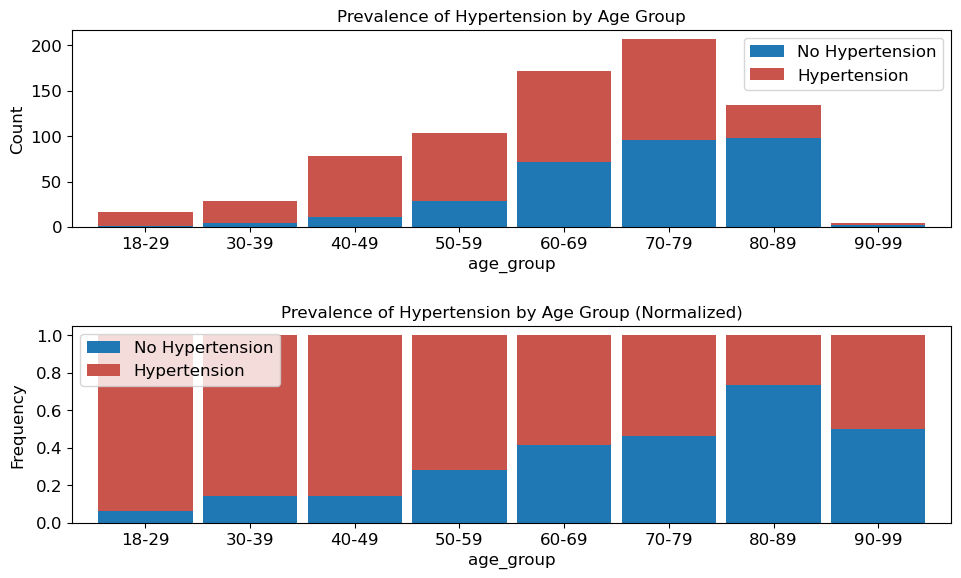

Hypertension (1=yes; 0=no),No Hypertension,Hypertension,Total,Hypertension_%,No Hypertension_%,Total_%,Identifier
age_group,,,,,,,
18-29,1,15,16,94.0,6.0,100.0,Hypertension (1=yes; 0=no)
30-39,2,26,28,93.0,7.0,100.0,Hypertension (1=yes; 0=no)
40-49,5,73,78,94.0,6.0,100.0,Hypertension (1=yes; 0=no)
50-59,1,103,104,99.0,1.0,100.0,Hypertension (1=yes; 0=no)
60-69,4,168,172,98.0,2.0,100.0,Hypertension (1=yes; 0=no)
70-79,6,201,207,97.0,3.0,100.0,Hypertension (1=yes; 0=no)
80-89,1,133,134,99.0,1.0,100.0,Hypertension (1=yes; 0=no)
90-99,0,4,4,100.0,0.0,100.0,Hypertension (1=yes; 0=no)
Total,20,723,743,97.0,3.0,100.0,Hypertension (1=yes; 0=no)


In [4]:
colors = ["#1f77b4", "#c8544c"]
esrd_legend = ["No ESRD", "ESRD"]

# Functional columns defined
explore_columns = [
    "ESRD",
    "Diabetes (1=yes; 0=no)",
    "Hypertension (1=yes; 0=no)",
    "SEX",
]


# Legends and titles corresponding to each 'Functional' column
labels_list = [
    ["No ESRD", "ESRD"],
    ["No Diabetes", "Diabetes"],
    ["No Hypertension", "Hypertension"],
]

# Mapping of columns to their nature (good/bad)
nature_of_outcomes = {
    "ESRD": "bad",
    "Diabetes": "bad",
    "Hypertension": "bad",
}

# List of custom plotting titles
title_list = [
    "ESRD",
    "Diabetes",
    "Hypertension",
    "SEX",
]

# Define a base color mapping that can be reversed if needed
base_colors = {
    "good": ["#c8544c", "#1f77b4"],
    "bad": ["#1f77b4", "#c8544c"],
}

# Dictionary to store each crosstab DataFrame
crosstabs_dict = {}

###################### Create crosstab data tables #############################
# Loop through the columns and names
for expl_col, names in zip(explore_columns, labels_list):
    # Create crosstab for the current column
    crosstab = pd.crosstab(
        df_eda["age_group"], df_eda[expl_col], margins=True, margins_name="Total"
    ).rename(columns={0: names[0], 1: names[1]})

    # Calculate percentages
    crosstab[names[1] + "_%"] = round(crosstab[names[1]] / crosstab["Total"], 2) * 100
    crosstab[names[0] + "_%"] = round(crosstab[names[0]] / crosstab["Total"], 2) * 100
    crosstab["Total_%"] = crosstab[names[1] + "_%"] + crosstab[names[0] + "_%"]

    # Store the crosstab in the dictionary
    crosstabs_dict[expl_col] = crosstab

# Accessing one of the crosstabs, for example for "Functional_Outcomes_Pain"
esrd_by_age = crosstabs_dict["ESRD"]
diab_by_age = crosstabs_dict["Diabetes (1=yes; 0=no)"]
sex_by_age = crosstabs_dict["Hypertension (1=yes; 0=no)"]

############### Save new csv file w/ functional outcomes by age ##############

# Combine all crosstabs horizontally (side by side)
all_crosstabs_combined = pd.concat(list(crosstabs_dict.values()), axis=1)

# Save each crosstab in its tab and the combined DataFrame in the last tab
# Loop through the crosstabs and save each to a CSV file
# Add an identifier column to each crosstab
for expl_col, crosstab in crosstabs_dict.items():
    crosstab["Identifier"] = expl_col  # Adding a new column to identify the data

# Concatenate all crosstabs into a single DataFrame
all_crosstabs_combined = pd.concat(crosstabs_dict.values(), ignore_index=True)
all_crosstabs_combined.to_csv(os.path.join(data_path, "combined_crosstabs.csv"))

print(f"All crosstabs have been saved in {data_path}.")

################################################################################

######################### Plot the Stacked Bar Graphs ##########################

# For each plot, correctly constructing the full path including the filename

image_path_png = os.path.join(base_path, "images", "png_images")
image_path_svg = os.path.join(base_path, "images", "svg_images")

# Loop through the columns, legends, and titles
# Loop through the columns, legends, and titles for plotting
for expl_col, legend_labels, title in zip(explore_columns, labels_list, title_list):
    # Correctly identify nature of the outcome to determine color mapping
    nature = nature_of_outcomes.get(
        expl_col.split(" ")[0], "bad"
    )  # Default to "bad" if not found
    colors = base_colors[nature]

    # Create full file paths for saving the images
    func_col_filename_png = os.path.join(image_path_png, f"Age_by_{expl_col}.png")
    func_col_filename_svg = os.path.join(image_path_svg, f"Age_by_{expl_col}.svg")
    image_path = {"png": func_col_filename_png, "svg": func_col_filename_svg}

    stacked_plot(
        x=12,
        y=8,
        p=10,
        df=df_eda,
        col="age_group",
        truth="ESRD",
        condition=1,
        kind="bar",
        width=0.9,
        rot=0,
        legend_labels=legend_labels,  # Use the corresponding legend labels
        image_path={"png": func_col_filename_png, "svg": func_col_filename_svg},
        img_string=f"presence_of_{title.lower()}_by_age",
        save_formats=["png", "svg"],
        custom_title=f"Prevalence of {title} by Age Group",
        color=colors,
    )
    display(crosstabs_dict[expl_col])